In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import lightgbm as lgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, max_error

import pickle


In [2]:
df_train = pd.read_csv('../datasets/pre_train.csv')
df_train.head()

,temperature_2m_max (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),shortwave_radiation_sum (MJ/m²),et0
0,31.3,25.9,34.8,0.0,0.0,0.0,17.41,3.90
1,32.5,28.2,36.0,0.2,0.2,1.0,15.43,3.69
2,32.4,27.0,35.3,0.0,0.0,0.0,18.64,4.34
3,32.3,28.1,36.4,0.1,0.1,1.0,15.47,3.52
4,31.4,26.3,35.4,0.0,0.0,0.0,17.40,3.99


In [3]:
df = pd.read_csv('../datasets/province/kalasin.csv', skiprows=3)
df = df.dropna()
df = df.rename(columns={'et0_fao_evapotranspiration (mm)':'et0'})
df = df[df_train.columns]
df.head()

,temperature_2m_max (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),shortwave_radiation_sum (MJ/m²),et0
0,31.1,26.0,34.3,0.0,0.0,0.0,15.15,3.58
1,31.8,26.7,35.0,0.0,0.0,0.0,16.65,3.87
2,30.3,26.4,32.5,0.0,0.0,0.0,14.26,3.70
3,30.7,25.9,34.4,0.0,0.0,0.0,16.17,3.55
4,31.7,27.0,35.2,0.0,0.0,0.0,15.36,3.50


In [4]:
X_test = df.drop(columns=['et0'])
y_test  = df['et0']

In [5]:
with open('../datasets/lgbm_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [6]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [7]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

absolute_percentage_errors = np.abs((y_test -  y_pred) / y_test)
mape = np.mean(absolute_percentage_errors) * 100  #
max_err = max_error(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("Max Error:", max_err)

R-squared (R2) Score: 0.9744257033066656
Root Mean Squared Error (RMSE): 0.19417655742667161
Mean Absolute Percentage Error (MAPE): 3.14%
Max Error: 1.3339183527188165


In [8]:
len(y_pred)

5000

In [9]:
y_test

0       3.58
1       3.87
2       3.70
3       3.55
4       3.50
        ... 
4995    3.01
4996    1.72
4997    1.27
4998    1.54
4999    2.47
Name: et0, Length: 5000, dtype: float64

In [10]:
lst_save = []
lst_water = []
for i in range(12):
    water_used = 0
    for et in y_test[(i*365)+90:(i*365)+90+270]:
        water_used += et * 0.71
        
    lst_save.append(1016 - water_used)
    lst_water.append(water_used)

In [11]:
lst_save = []
lst_water = []
for i in range(12):
    water_used = 0
    for et in y_test[(i*365)+90:(i*365)+90+270]:
        water_used += et * 0.71
        
    lst_save.append(1016 - water_used)
    lst_water.append(water_used)

In [12]:
lst_save = []
lst_water = []
for i in range(12):
    water_used = 0
    for et in y_test[(i*365)+90:(i*365)+90+270]:
        water_used += et * 0.71
        
    lst_save.append(1016 - water_used)
    lst_water.append(water_used)

In [13]:
df_save = pd.DataFrame()
df_save['water_used'] = lst_water
df_save['save'] = lst_save
df_save['save%'] = (1016 - df_save['water_used']) / 1016 * 100
df_save

,water_used,save,save%
0,807.1138,208.8862,20.559665
1,743.1783,272.8217,26.852530
2,785.8990,230.1010,22.647736
3,795.5763,220.4237,21.695246
4,790.4004,225.5996,22.204685
5,851.8580,164.1420,16.155709
6,822.8048,193.1952,19.015276
7,750.4984,265.5016,26.132047
8,804.9341,211.0659,20.774203
9,874.5283,141.4717,13.924380


In [14]:
df_save['save%'].mean()

20.684055118110262

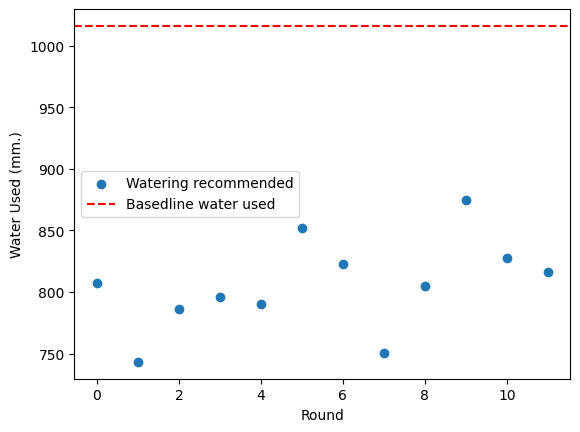

In [36]:
plt.scatter(df_save.index, df_save['water_used'], label='Watering recommended')

plt.xlabel('Round')
plt.ylabel('Water Used (mm.)')
plt.axhline(y=1016, color='r', linestyle='--', label='Basedline water used')

plt.legend()
plt.show()

In [85]:
for i in range(16):
    water_used = 0
    for et in y_pred[i*300:(i*300)+300]:
        water_used += et * 0.71
    print(water_used)

936.8642938425783
908.1682845818925
865.6973954266496
915.1032139656401
863.1023221289144
902.2191949068905
987.7552469871398
995.7224091395475
894.3983047580465
820.5469855492273
888.2926241939568
1011.6737208115494
1029.0901081151605
933.2993323871107
887.5474624035738
851.2687167968945


In [39]:
y_pred.mean()

4.33699246568404